### 9. Flöde för regression med datasetet data_01.csv

Linear RMSE: 3.592300959691068
Tree RMSE: 99.3594190386419
Test RMSE: 3.3715490775155392


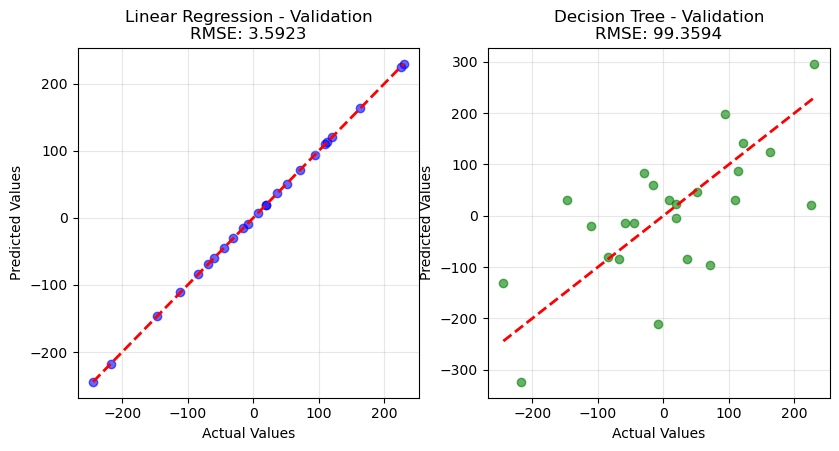

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

# a) Läs in datasetet
df = pd.read_csv("data_01.csv")

# b) Dela upp i X och y
X = df.drop("target", axis=1)
y = df["target"]

# c) Dela upp i train, val, test
# Först train + val och test (_val o _full samma (man kan kalla det vad man vill.))
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sedan train och val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# d) Träna två regressionsmodeller

lin_reg = LinearRegression().fit(X_train, y_train)
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# e) Utvärdera på valideringsdata
lin_pred = lin_reg.predict(X_val)
tree_pred = tree_reg.predict(X_val)

lin_rmse = root_mean_squared_error(y_val, lin_pred)
tree_rmse = root_mean_squared_error(y_val, tree_pred)


lin_pred_val = lin_reg.predict(X_val)
tree_pred_val = tree_reg.predict(X_val)

print("Linear RMSE:", lin_rmse)
print("Tree RMSE:", tree_rmse)

# f) Välj bästa modell och träna om på train + val
best_model = lin_reg if lin_rmse < tree_rmse else tree_reg
best_model.fit(X_train_val, y_train_val)

# g) Utvärdera på testdatan
test_pred = best_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, test_pred)
print("Test RMSE:", test_rmse)

# h) Träna på hela datasetet
final_model = best_model.fit(X, y)

## Visa plots på Values och Predicted Val
plt.figure(figsize=(15, 10))

## AI Generated
plt.subplot(2, 3, 1)
plt.scatter(y_val, y_val, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression - Validation\nRMSE: {lin_rmse:.4f}')
plt.grid(True, alpha=0.3)

## Sebbe Kod
plt.subplot(2, 3, 2)
plt.scatter(y_val, tree_pred_val, alpha=0.6, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Decision Tree - Validation\nRMSE: {tree_rmse:.4f}')
plt.grid(True, alpha=0.3)